In [ ]:
# This is the main file for our team project
# the purpose of this project is to analyze the big data files and answer few questions regarding:
#1. The relationship of the houe price and the weather in the US
#2. The relationship of the houe price and the House Income in the US
#3. The relationship of the houe price and the population in the US

In [1]:
# All dependency
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import requests as req
import random
from uszipcode import ZipcodeSearchEngine


In [2]:
#Read the date files
csv_path = os.path.join('..', 'data', 'Zip_Zhvi_2bedroom.csv')
df_2bed = pd.read_csv(csv_path)
csv_path2 = os.path.join('..', 'data', 'Zip_Zhvi_3bedroom.csv')
df_3bed = pd.read_csv(csv_path2)
csv_path3 = os.path.join('..', 'data', 'census_data.csv')
census_df = pd.read_csv(csv_path3)
census_df["Zipcode"] = census_df["Zipcode"].astype(str).str.zfill(5)
census_df.head()
len(census_df)

33120

In [3]:
#Extract unique zipcodes 
unique_zip=census_df["Zipcode"].unique()
len(unique_zip)

33120

In [4]:
df_2a = df_2bed[["RegionName", 'City', 'State'
, 'CountyName'
,'2017-11']]
df2 = df_2a[np.isfinite(df_2a['2017-11'])]
df2['2017-11'] = df2['2017-11'].apply(np.int32)
df2 = df2.rename(columns={'RegionName': 'Zipcode', '2017-11' : 'Price'})
df_3a = df_3bed[["RegionName", 'City', 'State'
, 'CountyName'
,'2017-11']]
df3 = df_3a[np.isfinite(df_3a['2017-11'])]
df3['2017-11'] = df3['2017-11'].apply(np.int32)
df3 = df3.rename(columns={'RegionName': 'Zipcode', '2017-11' : 'Price'})
df2['Zipcode'] = df2['Zipcode'].astype(str).str.zfill(5)
df3['Zipcode'] = df3['Zipcode'].astype(str).str.zfill(5)

C:\Users\Beheshteh\Anaconda3\envs\phytonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [5]:
df2.head()

,Zipcode,City,State,CountyName,Price
0,10025,New York,NY,New York,1469200
1,60657,Chicago,IL,Cook,378200
2,10023,New York,NY,New York,1968600
3,60614,Chicago,IL,Cook,405900
4,79936,El Paso,TX,El Paso,84300


In [6]:
inner_merge_df = pd.merge(df2, census_df, on="Zipcode")
inner_merge_df2 = pd.merge(df3, census_df, on="Zipcode")

In [7]:
inner_merge_df.head()

,Zipcode,City,State,CountyName,Price,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,10025,New York,NY,New York,1469200,94717,40.6,"80,025",63711.0,14515,15.324599
1,60657,Chicago,IL,Cook,378200,70105,30.9,"84,319",67680.0,6455,9.207617
2,10023,New York,NY,New York,1968600,60307,42.5,"115,080",111473.0,4419,7.327508
3,60614,Chicago,IL,Cook,405900,69817,30.1,"94,640",71659.0,6822,9.771259
4,79936,El Paso,TX,El Paso,84300,113255,31.2,"52,422",22053.0,15663,13.829853


In [8]:
inner_merge_df2.head()

,Zipcode,City,State,CountyName,Price,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,60657,Chicago,IL,Cook,567300,70105,30.9,"84,319",67680.0,6455,9.207617
1,60614,Chicago,IL,Cook,628700,69817,30.1,"94,640",71659.0,6822,9.771259
2,79936,El Paso,TX,El Paso,111700,113255,31.2,"52,422",22053.0,15663,13.829853
3,60640,Chicago,IL,Cook,375200,67088,37.5,"47,390",38673.0,14206,21.175173
4,77084,Houston,TX,Harris,151400,103635,32.6,"66,914",27973.0,11839,11.423747


In [18]:
latlnglist = []

for zip in inner_merge_df['Zipcode']:
    search = ZipcodeSearchEngine()
    zipcode = search.by_zipcode(zip)
    lat = zipcode['Latitude']
    lng = zipcode['Longitude']
    zipcoord = {"Zipcode": zip, "Lat":lat, "Lng": lng}
    latlnglist.append(zipcoord)

In [19]:
latlnglist2 = []

for zip in inner_merge_df2['Zipcode']:
    search = ZipcodeSearchEngine()
    zipcode = search.by_zipcode(zip)
    lat = zipcode['Latitude']
    lng = zipcode['Longitude']
    zipcoord = {"Zipcode": zip, "Lat":lat, "Lng": lng}
    latlnglist2.append(zipcoord)

In [20]:
hdf = pd.DataFrame(latlnglist)
hdf.head()

,Lat,Lng,Zipcode
0,40.799921,-73.968310,10025
1,41.940379,-87.653180,60657
2,40.776906,-73.980064,10023
3,41.920347,-87.643314,60614
4,31.759979,-106.287521,79936


In [21]:
hdf2 = pd.DataFrame(latlnglist2)
hdf2.head()

,Lat,Lng,Zipcode
0,41.940379,-87.653180,60657
1,41.920347,-87.643314,60614
2,31.759979,-106.287521,79936
3,41.970313,-87.663045,60640
4,29.829651,-95.666831,77084


In [22]:
latlngmerge = pd.merge(inner_merge_df, hdf, on="Zipcode")
latlngmerge.head()

,Zipcode,City,State,CountyName,Price,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Lat,Lng
0,10025,New York,NY,New York,1469200,94717,40.6,"80,025",63711.0,14515,15.324599,40.799921,-73.968310
1,60657,Chicago,IL,Cook,378200,70105,30.9,"84,319",67680.0,6455,9.207617,41.940379,-87.653180
2,10023,New York,NY,New York,1968600,60307,42.5,"115,080",111473.0,4419,7.327508,40.776906,-73.980064
3,60614,Chicago,IL,Cook,405900,69817,30.1,"94,640",71659.0,6822,9.771259,41.920347,-87.643314
4,79936,El Paso,TX,El Paso,84300,113255,31.2,"52,422",22053.0,15663,13.829853,31.759979,-106.287521


In [23]:
latlngmerge2 = pd.merge(inner_merge_df2, hdf2, on="Zipcode")
latlngmerge2.head()

,Zipcode,City,State,CountyName,Price,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Lat,Lng
0,60657,Chicago,IL,Cook,567300,70105,30.9,"84,319",67680.0,6455,9.207617,41.940379,-87.653180
1,60614,Chicago,IL,Cook,628700,69817,30.1,"94,640",71659.0,6822,9.771259,41.920347,-87.643314
2,79936,El Paso,TX,El Paso,111700,113255,31.2,"52,422",22053.0,15663,13.829853,31.759979,-106.287521
3,60640,Chicago,IL,Cook,375200,67088,37.5,"47,390",38673.0,14206,21.175173,41.970313,-87.663045
4,77084,Houston,TX,Harris,151400,103635,32.6,"66,914",27973.0,11839,11.423747,29.829651,-95.666831


In [41]:
latlngmerge = latlngmerge.rename(columns = {'Per Capita Income' : 'Income'})
latlngmerge2 = latlngmerge2.rename(columns = {'Per Capita Income' : 'Income'})


In [42]:
path_d ='C:\\Users\\Beheshteh\\Documents'
latlngmerge.to_csv(os.path.join(path_d, 'twobed.csv'), index = False)
latlngmerge2.to_csv(os.path.join(path_d, 'threebed.csv'), index = False)


In [43]:
# In this section , We need to defind all the function needed to find the effect of weather on price
# of the house.


# Build partial query URL

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key =  #get_file_contents(filename)
query_url = url + "appid=" + api_key + "&units=" + units + "&zip=" 

# Get 3000 random zipcode from the dataframe and get the avarage price for all with the same zipcode
def get_random3000(df):
    random3000_zipcodes = []
    random3000_price = []
    Zipcodes = df["Zipcode"].unique() 
    random3000_zipcodes = [ Zipcodes[i] for i in sorted(random.sample(range(len(Zipcodes)), 3000)) ]
 
    for code in random3000_zipcodes:
        
        prices = df[df.Zipcode == code ]['Price']
        avarage_price = float(sum(p for p in prices)) / len(prices)
        random3000_price.append(avarage_price)
        next
        
    return(random3000_zipcodes, random3000_price )
    

# this function for Loop through the list of Zipcodes and perform a request 
# for tempture on the specified zipcodes and return the time of query, lattitude,
# longttitude and tempature

def get_tempture_for_zipcode(Zipcodes):
    lat_list = []
    lon_list = []
    temp_list = []
    #weather_data = []
    errordatacount = 0
    zipcount = 0
    
    for zipcode in Zipcodes:
        
        response = req.get(query_url + str(zipcode) ).json()
        try:
            lat_list.append(response["coord"]["lat"])
            lon_list.append(response["coord"]["lon"])
            temp_list.append(response["main"]["temp"])
            #time_data = response["dt"]
            zipcount +=1 
            #print(zipcount)
        except:
            print("%s Error with Zipcode data. Skipping", errordatacount)
            errordatacount +=1
            
    return(lat_list, lon_list, temp_list) 


In [44]:
# Call the file for getting the tempture for three bedrooms house

three_lat_list = []
three_lon_list = []
three_temp_list = []
random3_zipcodes = []
random3_price = []


#random3_zipcodes, random3_price = get_random3000(df3)
#three_lat_list, three_lon_list, three_temp_list = get_tempture_for_zipcode(random3_zipcodes)


In [45]:
#Zipcodeweather3_data = { "ZipCode": random3_zipcodes, "Lng": three_lon_list,
                        # "Lat": three_lat_list, "Tempature (C)": three_temp_list,  
                        # "Price": random3_price}

#Zipcodeweather3_data = pd.DataFrame(Zipcodeweather3_data)

#write all the info in the csv file
#Zipcodeweather3_data.to_csv('Zipcodeweather_3bed_file.csv', index=True, header=True)
csv_path = os.path.join('..', 'data', 'Zipcodeweather3file.csv')
Zipcodeweather3_data = pd.read_csv(csv_path)       
Zipcodeweather3_data.head()


,Unnamed: 0,Lat,Lng,Price,Tempature (C),ZipCode
0,0,41.92,-87.65,628700.0,2.50,60614
1,1,37.79,-122.42,1928200.0,11.23,94109
2,2,28.93,-81.96,235100.0,13.77,32162
3,3,41.95,-87.70,455800.0,2.44,60618
4,4,41.95,-87.66,472700.0,2.50,60613


In [46]:
bins = [-10, 10, 30, 55, 75]
def do_bin_tempature(weather_data):
    group_names = ['freezing', 'cold', 'warm', 'hot']
    pd.cut(weather_data["Tempature (C)"], bins, labels=group_names)
    weather_data["Tempature (C)"] = pd.cut(weather_data["Tempature (C)"], bins, labels=group_names)
    return(weather_data)

In [47]:
def Create_plot(weather_data):
    
    #Create the bin tempature based on ['freezing, -32_-10', 'cold, -10_45', 'warm, 45_75', 'hot, 75_100']
    do_bin_tempature(weather_data)
    
    #Based on the tempature 
    Freezingtemp = weather_data[weather_data["Tempature (C)"] == "freezing"]
    Coldtemp = weather_data[weather_data["Tempature (C)"] == "cold"]
    Warmtemp = weather_data[weather_data["Tempature (C)"] == "warm"]
    Hottemp = weather_data[weather_data["Tempature (C)"] == "hot"]

    Freezinglat = Freezingtemp.groupby(["ZipCode"]).max()["Lat"]
    Freezinglng = Freezingtemp.groupby(["ZipCode"]).max()["Lng"]
    Freezingprice = Freezingtemp.groupby(["ZipCode"]).mean()["Price"]

    coldlat = Coldtemp.groupby(["ZipCode"]).max()["Lat"]
    coldlng = Coldtemp.groupby(["ZipCode"]).max()["Lng"]
    coldprice = Coldtemp.groupby(["ZipCode"]).mean()["Price"]

    warmlat = Warmtemp.groupby(["ZipCode"]).max()["Lat"]
    warmlng = Warmtemp.groupby(["ZipCode"]).max()["Lng"]
    warmprice = Warmtemp.groupby(["ZipCode"]).mean()["Price"]

    hotlat = Hottemp.groupby(["ZipCode"]).max()["Lat"]
    hotlng = Hottemp.groupby(["ZipCode"]).max()["Lng"]
    hotprice = Hottemp.groupby(["ZipCode"]).mean()["Price"]
    
    
    
    plt.figure(figsize = (20,20))
    plt.scatter(Freezinglng, 
                Freezinglat, 
                s=Freezingprice / 10000, c="yellow", 
                edgecolor="black", linewidths=1, marker="o", 
                alpha=0.8, label="Freezing Temp")

    plt.scatter(coldlng, 
                coldlat, 
                s=coldprice / 10000, c="skyblue", 
                edgecolor="black", linewidths=1, marker="o", 
                alpha=0.8, label="cold Temp")

    plt.scatter(warmlng, 
                warmlat, 
                s=warmprice / 10000, c="orange", 
                edgecolor="black", linewidths=1, marker="o", 
                alpha=0.8, label="warm Temp")

    plt.scatter(hotlng, 
                hotlat, 
                s=hotprice / 10000, c="red", 
                edgecolor="black", linewidths=1, marker="o", 
                alpha=0.8, label="Hot Temp")

    plt.title("Effect of Tempture on house price in the US ")
    plt.ylabel("Lattitude")
    plt.xlabel("Longitude")
    plt.grid(True)

# Create a legend
    lgnd = plt.legend(fontsize="small", mode="Expanded", 
                      numpoints=1, scatterpoints=1, 
                      loc="best", title="Weather Type", 
                      labelspacing=0.5)
    lgnd.legendHandles[0]._sizes = [30]
    lgnd.legendHandles[1]._sizes = [30]
    lgnd.legendHandles[2]._sizes = [30]
    lgnd.legendHandles[3]._sizes = [30]

    plt.xlim((-130,-65))
# Incorporate a text label regarding circle size
        
    plt.savefig("output_temp_price.png")
    plt.show()
   

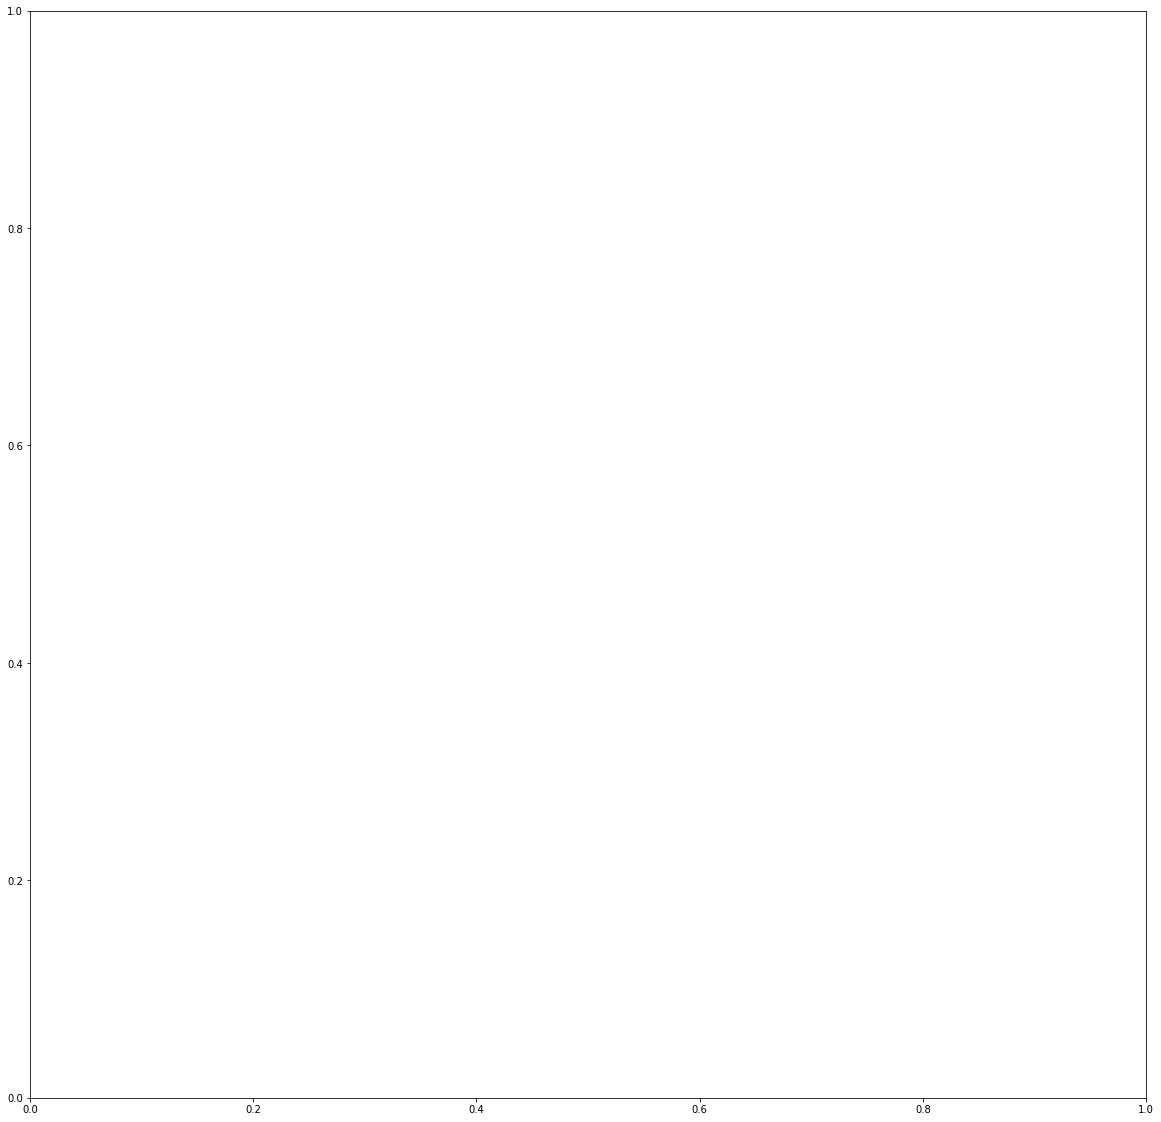

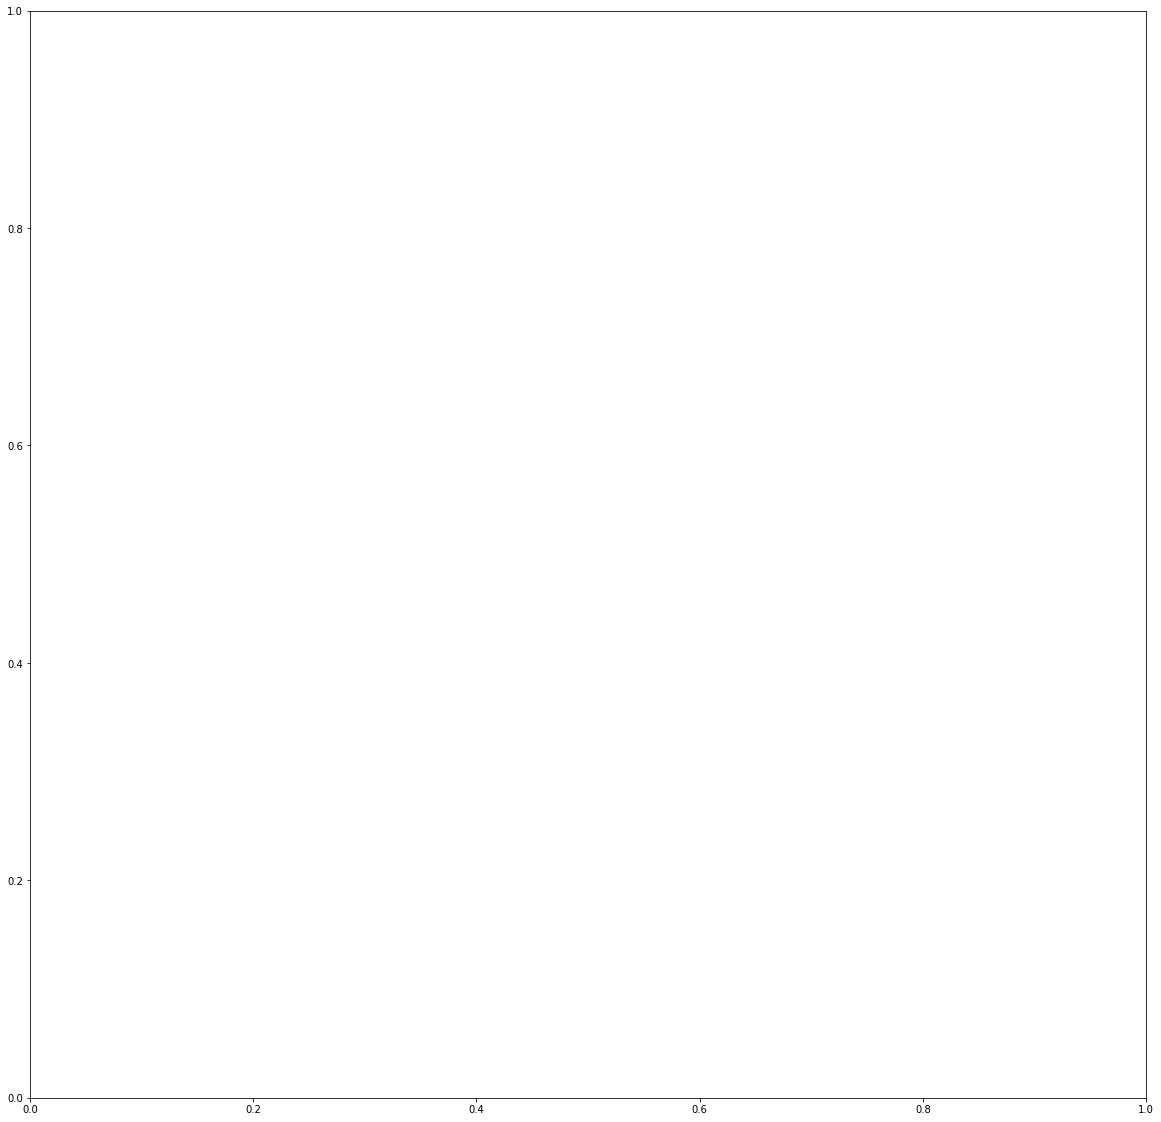

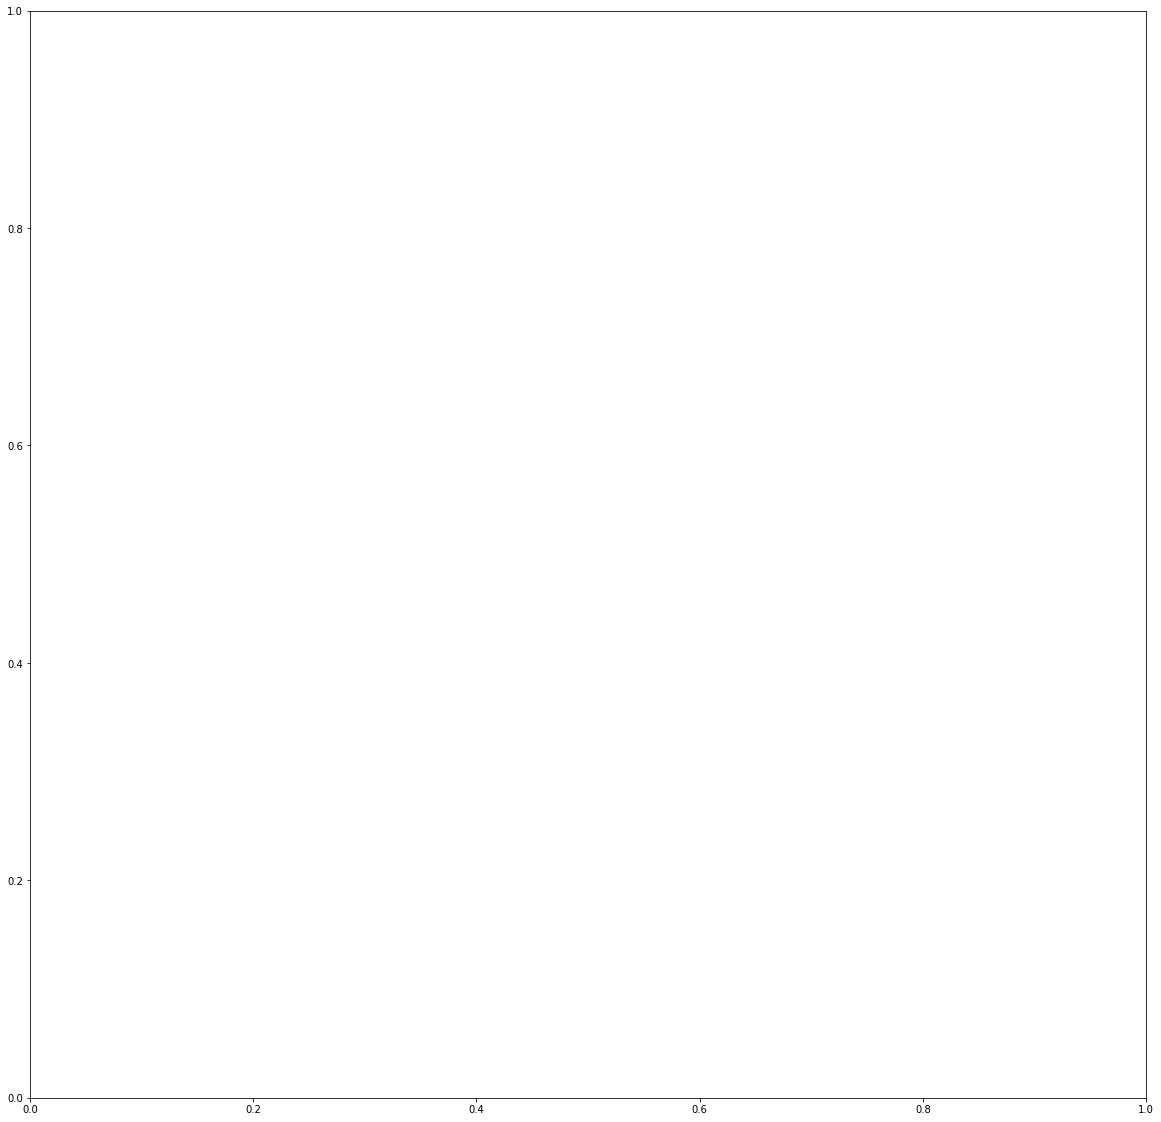

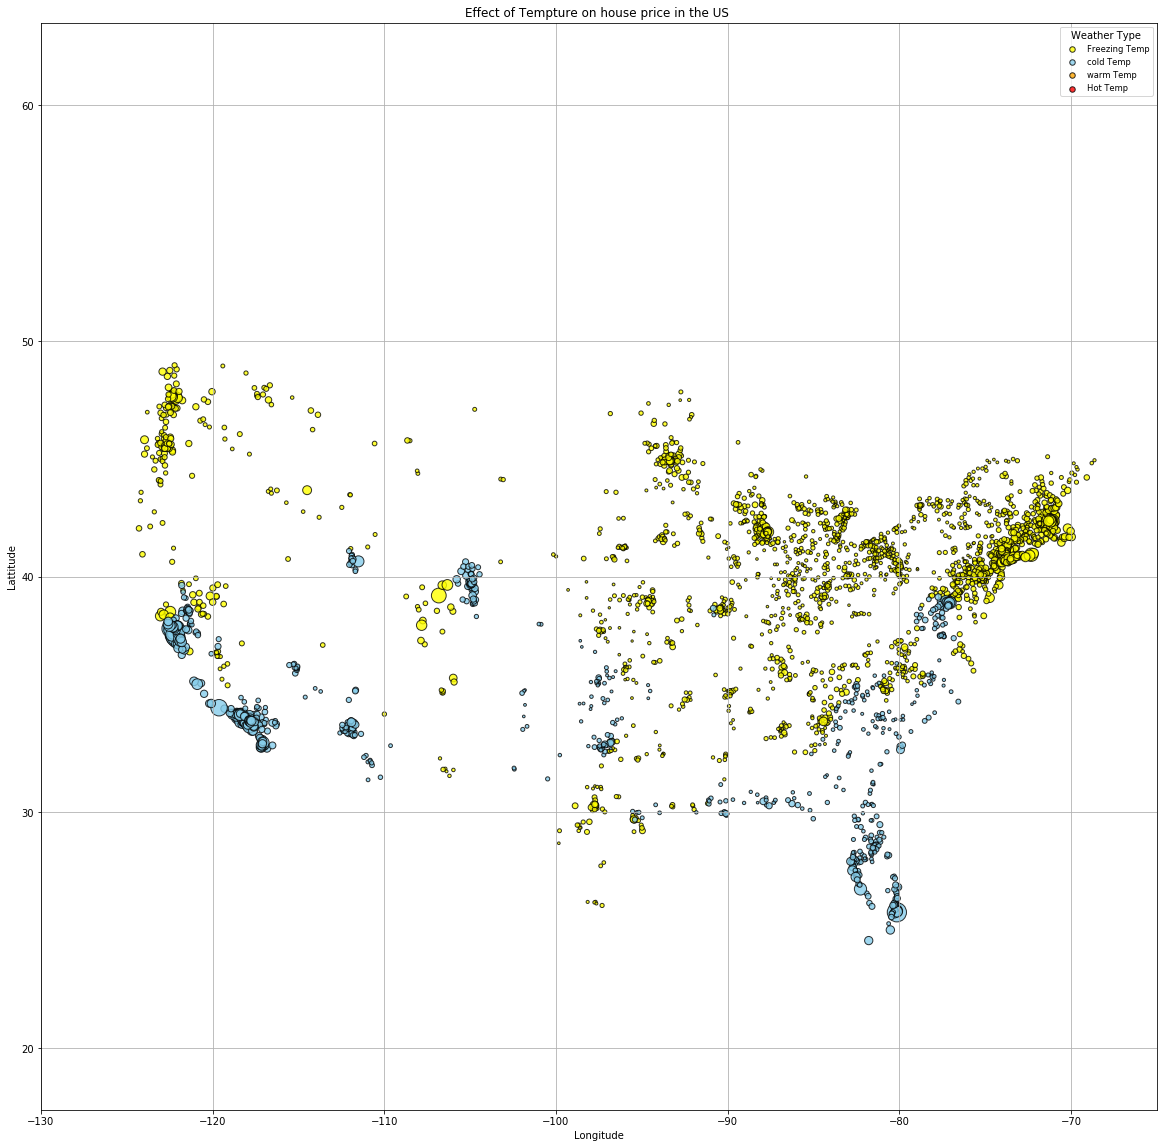

In [48]:

Create_plot(Zipcodeweather3_data)

In [13]:
# Call the file for getting the tempture for two bedrooms houses

two_lat_list = []
two_lon_list = []
two_temp_list = []
random2_zipcodes = []
random2_price = []


#random2_zipcodes, random2_price = get_random3000(df2)
#two_lat_list, two_lon_list, two_temp_list = get_tempture_for_zipcode(random2_zipcodes)


In [55]:
#Zipcodeweather2_data = { "ZipCode": random2_zipcodes, "Lng": two_lon_list,
                         #"Lat": two_lat_list, "Tempature (C)": two_temp_list,  
                         #"Price": random2_price}

#Zipcodeweather2_data = pd.DataFrame(Zipcodeweather2_data)

#write all the info in the csv file
#Zipcodeweather2_data.to_csv('Zipcodeweather2file_file.csv', index=True, header=True)  
csv_path = os.path.join('..', 'data', 'Zipcodeweather2file_file.csv')
Zipcodeweather2_data = pd.read_csv(csv_path)

Zipcodeweather2_data.head()

,Unnamed: 0,Lat,Lng,Price,Tempature (C),ZipCode
0,0,40.80,-73.97,1469200.0,1.15,10025
1,1,41.97,-87.66,254300.0,3.12,60640
2,2,41.92,-87.70,330000.0,3.11,60647
3,3,41.95,-87.70,275700.0,3.11,60618
4,4,29.54,-95.32,162400.0,11.51,77584


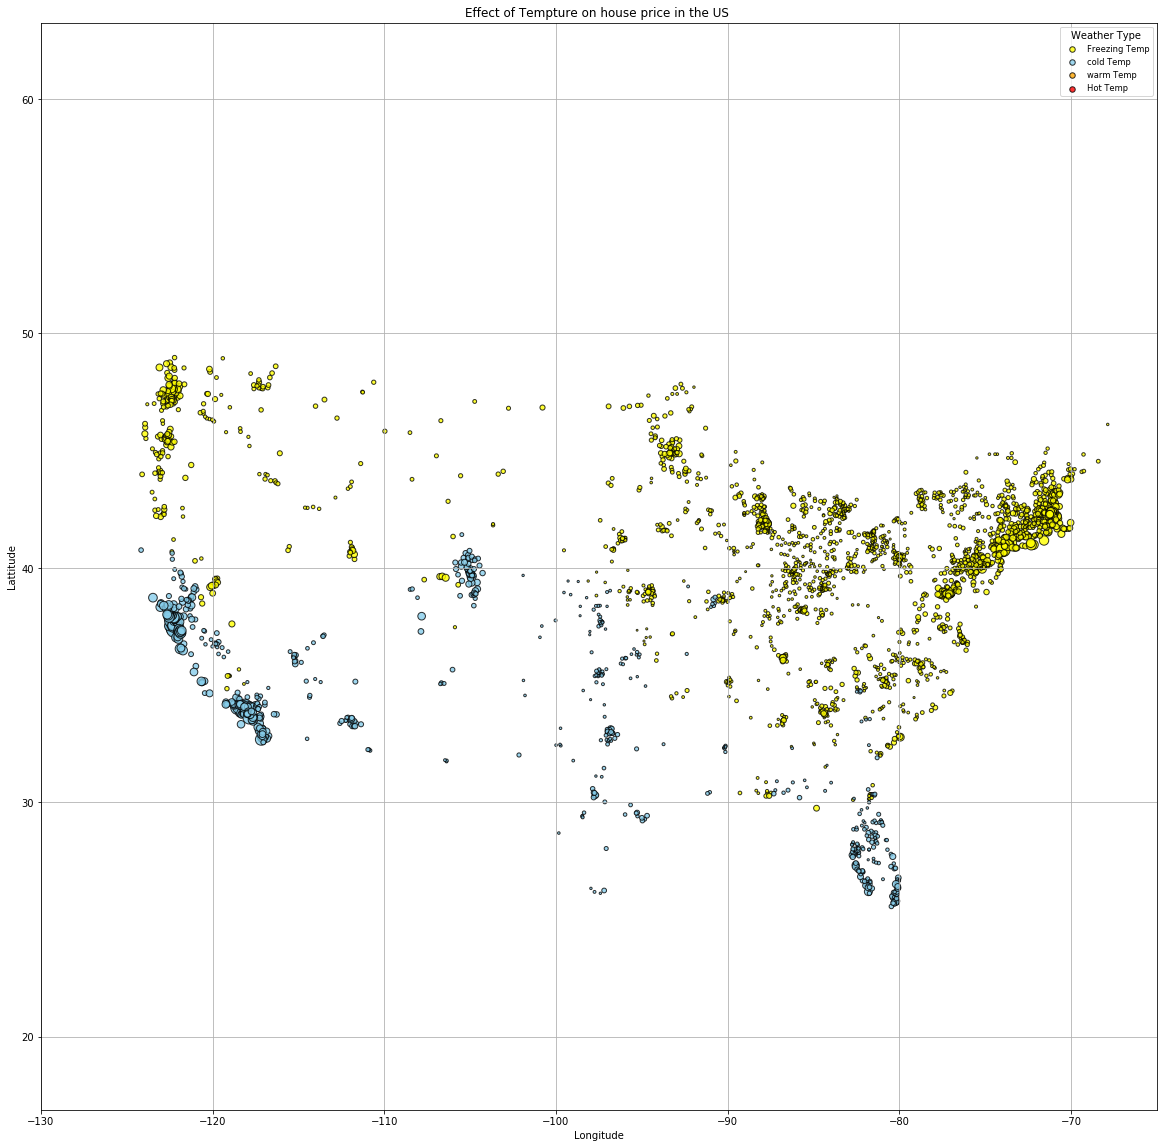

In [56]:
Create_plot(Zipcodeweather2_data)

In [74]:
#Weather in California
california_df = latlngmerge.loc[latlngmerge['State'] == "CA"]
california_df.head()

,Zipcode,City,State,CountyName,Price,Population,Median Age,Household Income,Income,Poverty Count,Poverty Rate,Lat,Lng
6,94109,San Francisco,CA,San Francisco,1303500,Middle,36.1,"71,043",Middle,7465,13.325836,37.792979,-122.421242
11,90250,Hawthorne,CA,Los Angeles,536400,High,32.5,"47,076",Low,18007,18.566406,33.912781,-118.352039
18,90046,Los Angeles,CA,Los Angeles,1033800,Middle,39.2,"61,157",Middle,7274,14.284312,34.114731,-118.363726
39,94501,Alameda,CA,Alameda,813600,High,40.2,"76,787",Low,6896,10.906560,37.771217,-122.282402
43,94110,San Francisco,CA,San Francisco,1358900,High,36.7,"97,563",Middle,8792,11.960115,37.748582,-122.418411


In [26]:
#
three_lat_list_CA = []
three_lon_list_CA = []
three_temp_list_CA = []

#three_lat_list_CA, three_lon_list_CA, three_temp_list_CA = get_tempture_for_zipcode(california_df['Zipcode'])


In [59]:
#CAweather3_data = { "ZipCode": california_df['Zipcode'], "Lng": three_lon_list_CA,
                      #  "Lat": three_lat_list_CA, "Tempature (C)": three_temp_list_CA,  
                      #   "Price": california_df['Price']}

#CAweather3_data = pd.DataFrame(CAweather3_data)
#CAweather3_data.to_csv('CAweather3file.csv', index=True, header=True)

csv_path = os.path.join('..', 'data', 'CAweather3file.csv')
CAweather3_data = pd.read_csv(csv_path)

CAweather3_data.head()

,Unnamed: 0,Lat,Lng,Price,Tempature (C),ZipCode
0,6,37.79,-122.42,1303500,12.15,94109
1,11,33.91,-118.35,536400,15.87,90250
2,18,34.11,-118.37,1033800,15.80,90046
3,39,37.77,-122.26,813600,12.14,94501
4,43,37.75,-122.42,1358900,12.08,94110


In [60]:
bins = [30, 55, 70, 85]
def do_bin_tempature_CA(weather_data):
    group_names = ['cold', 'warm', 'Vwarm']
    pd.cut(weather_data["Tempature (C)"], bins, labels=group_names)
    weather_data["Tempature (C)"] = pd.cut(weather_data["Tempature (C)"], bins, labels=group_names)
    return(weather_data)

In [65]:
def Create_plot_CA(weather_data):
    
    #Create the bin tempature based on ['freezing, -32_-10', 'cold, -10_45', 'warm, 45_75', 'hot, 75_100']
    do_bin_tempature_CA(weather_data)
    
    #Based on the tempature 
    Coldtemp = weather_data[weather_data["Tempature (C)"] == "cold"]
    Warmtemp = weather_data[weather_data["Tempature (C)"] == "warm"]
    Vwarmtemp = weather_data[weather_data["Tempature (C)"] == "Vwarm"]

    coldlat = Coldtemp["Lat"]
    coldlng = Coldtemp["Lng"]
    coldprice = Coldtemp["Price"]

    warmlat = Warmtemp["Lat"]
    warmlng = Warmtemp["Lng"]
    warmprice = Warmtemp["Price"]

    Vwarmlat = Vwarmtemp["Lat"]
    Vwarmlng = Vwarmtemp["Lng"]
    Vwarmprice = Vwarmtemp["Price"]
    
        
    plt.figure(figsize = (10,10))
    plt.scatter(coldlng, 
                coldlat, 
                s=coldprice / 10000, c="skyblue", 
                edgecolor="black", linewidths=1, marker="o", 
                alpha=0.8, label="cold Temp")

    plt.scatter(warmlng, 
                warmlat, 
                s=warmprice / 10000, c="orange", 
                edgecolor="black", linewidths=1, marker="o", 
                alpha=0.8, label="warm Temp")

    plt.scatter(Vwarmlng, 
                Vwarmlat, 
                s=Vwarmprice / 10000, c="red", 
                edgecolor="black", linewidths=1, marker="o", 
                alpha=0.8, label="Very warm Temp")

    plt.title("Effect of Tempture on house price in California ")
    plt.ylabel("Lattitude")
    plt.xlabel("Longitude")
    plt.grid(True)

# Create a legend
    lgnd = plt.legend(fontsize="small", mode="Expanded", 
                      numpoints=1, scatterpoints=1, 
                      loc="best", title="Weather Type", 
                      labelspacing=0.5)
    lgnd.legendHandles[0]._sizes = [30]
    lgnd.legendHandles[1]._sizes = [30]
    lgnd.legendHandles[2]._sizes = [30]
  

    plt.xlim((-125,-115))
# Incorporate a text label regarding circle size
        
    plt.savefig("output_temp_price_california.png")
    plt.show()


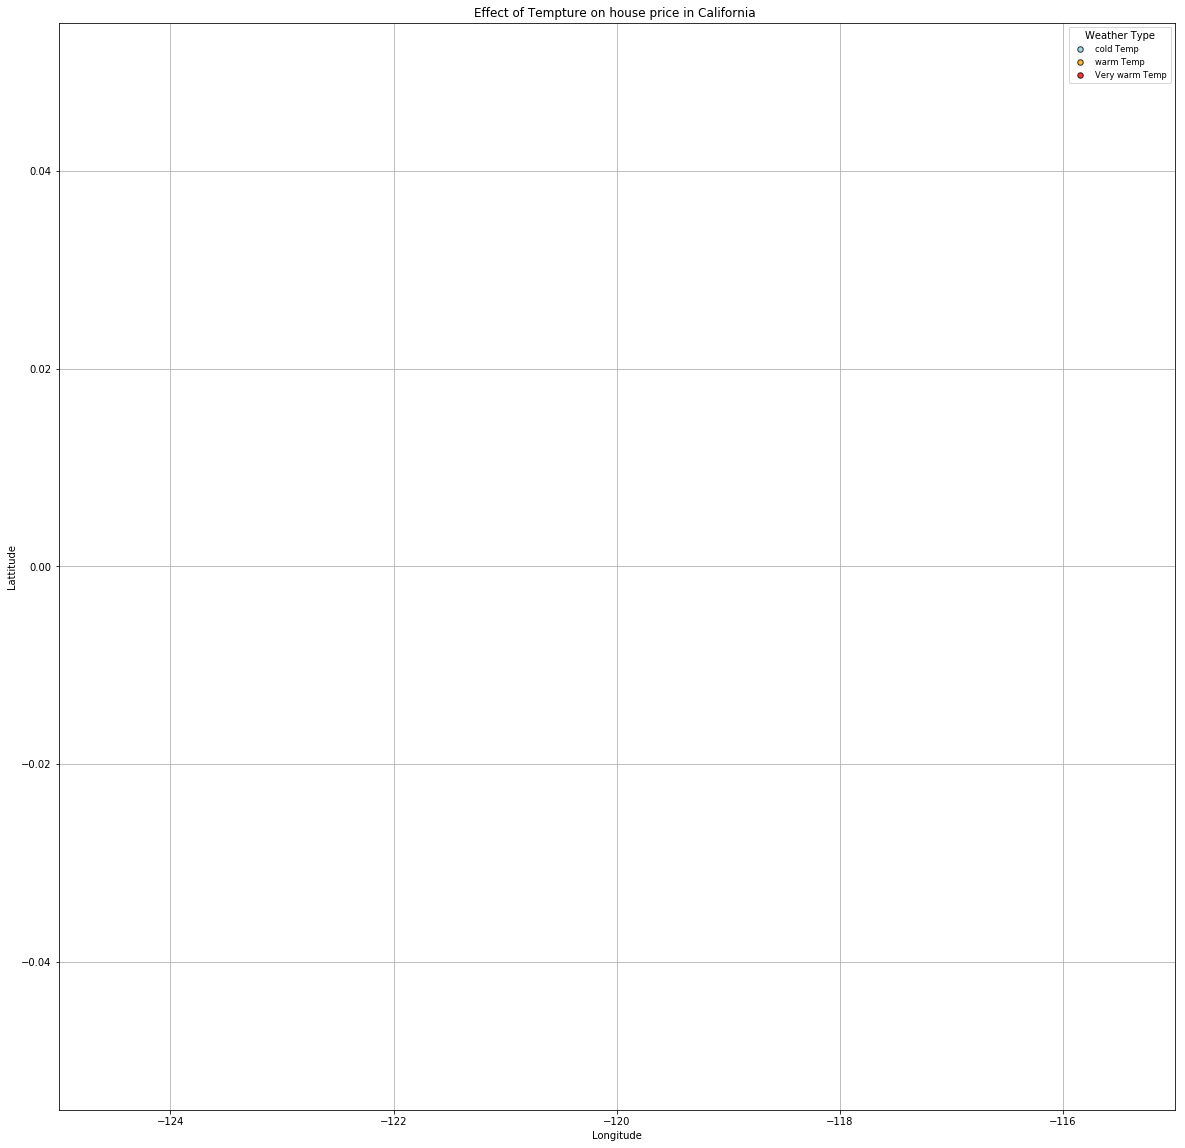

In [67]:
Create_plot_CA(CAweather3_data)

In [68]:
pbins = [0, 30000, 60000, 120000]

pgroup_names = ['Low', 'Middle', 'High']
pd.cut(latlngmerge["Population"], pbins, labels=pgroup_names)
latlngmerge["Population"] = pd.cut(latlngmerge["Population"],pbins, labels=pgroup_names)

In [69]:
ibins = [0, 50000, 120000, 999999]

igroup_names = ['Low', 'Middle', 'High']
pd.cut(latlngmerge["Income"], ibins, labels=igroup_names)
latlngmerge["Income"] = pd.cut(latlngmerge["Income"],ibins, labels=igroup_names)

igroup_names2 = ['Low', 'Middle', 'High']
pd.cut(latlngmerge2["Income"], ibins, labels=igroup_names)
latlngmerge2["Income"] = pd.cut(latlngmerge2["Income"],ibins, labels=igroup_names)

In [70]:
Lowpop = latlngmerge[latlngmerge["Population"] == "Low"]
Mediumpop = latlngmerge[latlngmerge["Population"] == "Middle"]
Highpop = latlngmerge[latlngmerge["Population"] == "High"]

lowlat = Lowpop.groupby(["Zipcode"]).max()["Lat"]
lowlng = Lowpop.groupby(["Zipcode"]).max()["Lng"]
lowprice = Lowpop.groupby(["Zipcode"]).mean()["Price"]

Mediumlat = Mediumpop.groupby(["Zipcode"]).max()["Lat"]
Mediumlng = Mediumpop.groupby(["Zipcode"]).max()["Lng"]
Mediumprice = Mediumpop.groupby(["Zipcode"]).mean()["Price"]

Highlat = Highpop.groupby(["Zipcode"]).max()["Lat"]
Highlng = Highpop.groupby(["Zipcode"]).max()["Lng"]
Highprice = Highpop.groupby(["Zipcode"]).mean()["Price"]


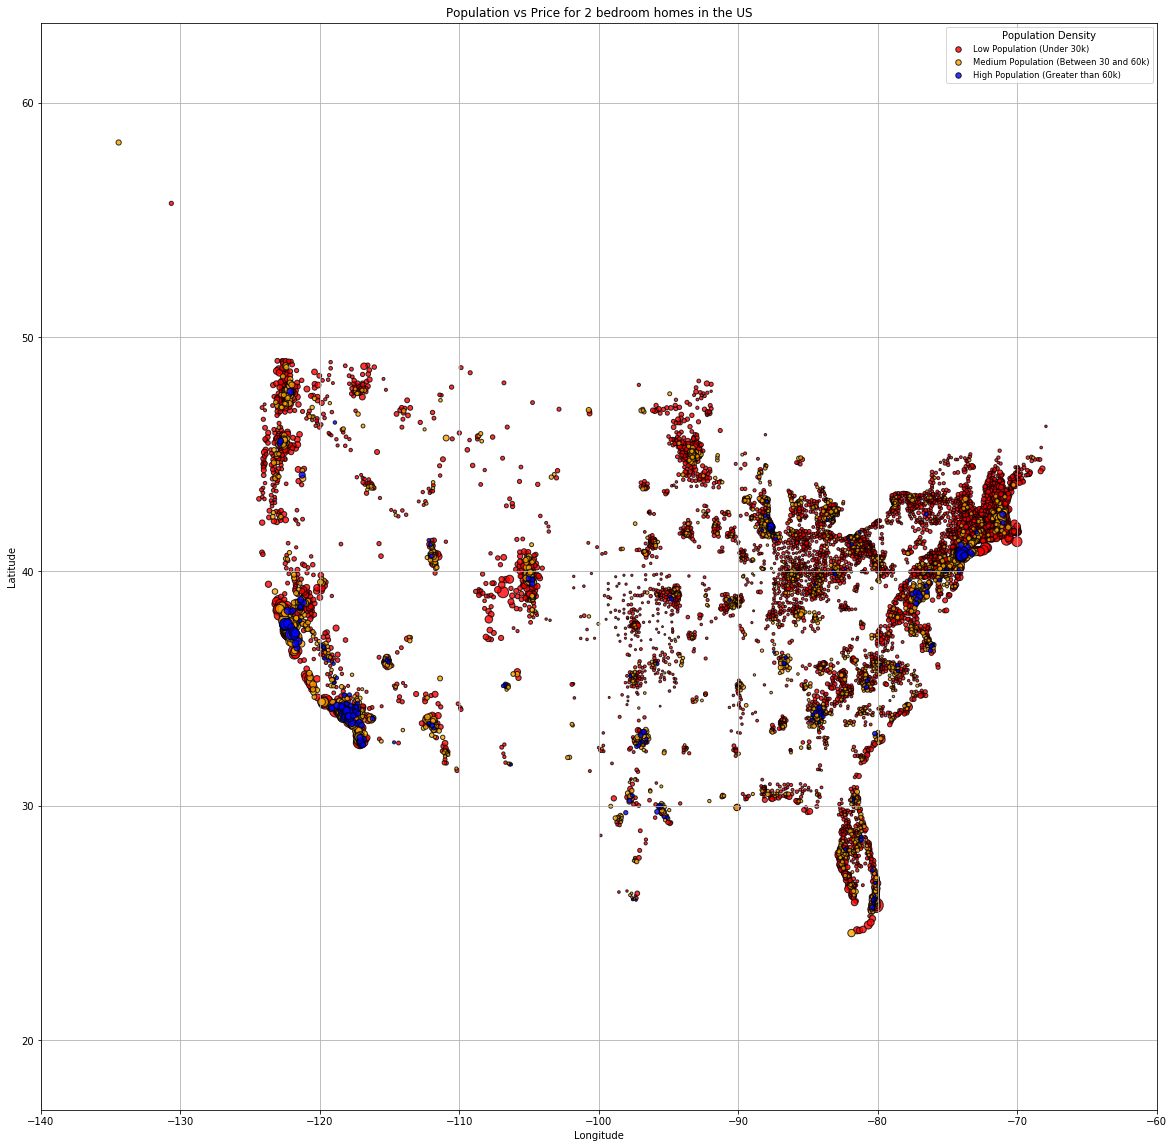

In [71]:
plt.figure(figsize = (20,20))
plt.scatter(lowlng, 
            lowlat, 
            s=lowprice / 10000, c="red", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Low Population (Under 30k)")

plt.scatter(Mediumlng, 
            Mediumlat, 
            s=Mediumprice / 10000, c="orange", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Medium Population (Between 30 and 60k)")

plt.scatter(Highlng, 
            Highlat, 
            s=Highprice / 10000, c="blue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="High Population (Greater than 60k)")

plt.title("Population vs Price for 2 bedroom homes in the US")
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="Population Density", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.xlim((-140,-60))
# Incorporate a text label regarding circle size
# plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")
plt.savefig("output_Population_price_2bedroom.png")
plt.show()

In [72]:
pgroup_names = ['Low', 'Middle', 'High']
pd.cut(latlngmerge2["Population"], pbins, labels=pgroup_names)
latlngmerge2["Population"] = pd.cut(latlngmerge2["Population"],pbins, labels=pgroup_names)

Lowpop2 = latlngmerge2[latlngmerge2["Population"] == "Low"]
Mediumpop2 = latlngmerge2[latlngmerge2["Population"] == "Middle"]
Highpop2 = latlngmerge2[latlngmerge2["Population"] == "High"]

lowlat2 = Lowpop2.groupby(["Zipcode"]).max()["Lat"]
lowlng2 = Lowpop2.groupby(["Zipcode"]).max()["Lng"]
lowprice2 = Lowpop2.groupby(["Zipcode"]).mean()["Price"]

Mediumlat2 = Mediumpop2.groupby(["Zipcode"]).max()["Lat"]
Mediumlng2 = Mediumpop2.groupby(["Zipcode"]).max()["Lng"]
Mediumprice2 = Mediumpop2.groupby(["Zipcode"]).mean()["Price"]

Highlat2 = Highpop2.groupby(["Zipcode"]).max()["Lat"]
Highlng2 = Highpop2.groupby(["Zipcode"]).max()["Lng"]
Highprice2 = Highpop2.groupby(["Zipcode"]).mean()["Price"]


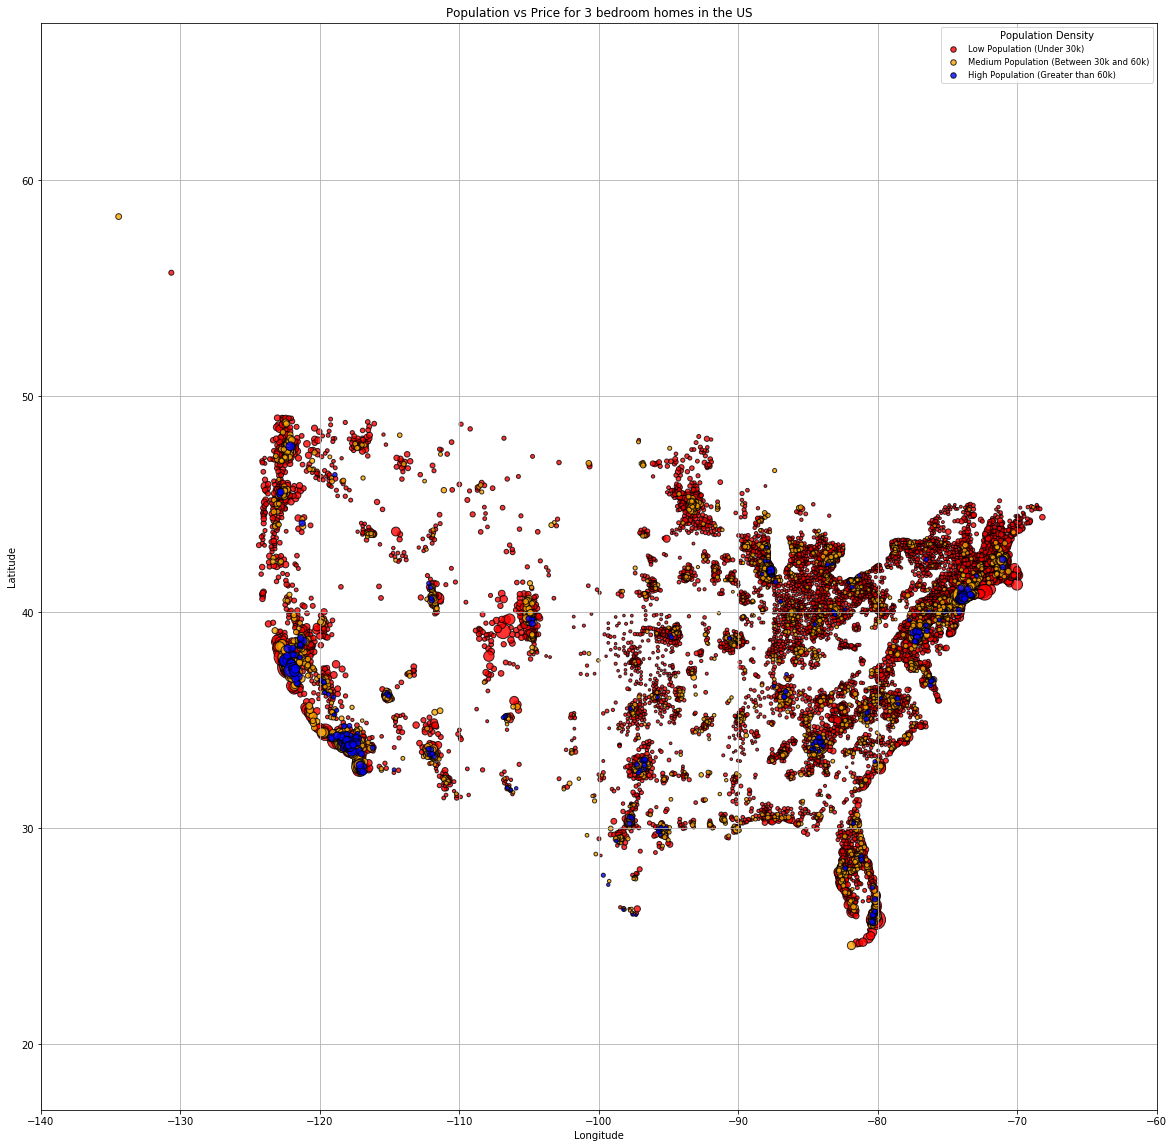

In [73]:
plt.figure(figsize = (20,20))
plt.scatter(lowlng2, 
            lowlat2, 
            s=lowprice2 / 10000, c="red", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Low Population (Under 30k)")

plt.scatter(Mediumlng2, 
            Mediumlat2, 
            s=Mediumprice2 / 10000, c="orange", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Medium Population (Between 30k and 60k)")

plt.scatter(Highlng2, 
            Highlat2, 
            s=Highprice2 / 10000, c="blue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="High Population (Greater than 60k)")

plt.title("Population vs Price for 3 bedroom homes in the US")
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="Population Density", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.xlim((-140,-60))
# Incorporate a text label regarding circle size
# plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")
plt.savefig("output_Population_price_3bedroom.png")
plt.show()

In [76]:
# Population in california and three bedroom
pbins = [0, 30000, 60000, 120000]

pgroup_names = ['Low', 'Middle', 'High']
pd.cut(california_df["Population"], pbins, labels=pgroup_names)
california_df["Population"] = pd.cut(california_df["Population"],pbins, labels=pgroup_names)

TypeError: '<' not supported between instances of 'int' and 'str'

In [77]:
Lowpop = california_df[california_df["Population"] == "Low"]
Mediumpop = california_df[california_df["Population"] == "Middle"]
Highpop = california_df[california_df["Population"] == "High"]

lowlat = Lowpop["Lat"]
lowlng = Lowpop["Lng"]
lowprice = Lowpop["Price"]

Mediumlat = Mediumpop["Lat"]
Mediumlng = Mediumpop["Lng"]
Mediumprice = Mediumpop["Price"]

Highlat = Highpop["Lat"]
Highlng = Highpop["Lng"]
Highprice = Highpop["Price"]

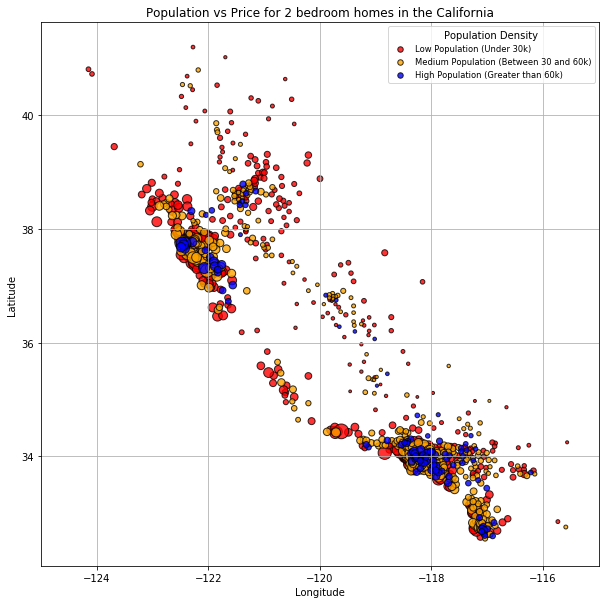

In [78]:
plt.figure(figsize = (10,10))
plt.scatter(lowlng, 
            lowlat, 
            s=lowprice / 10000, c="red", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Low Population (Under 30k)")

plt.scatter(Mediumlng, 
            Mediumlat, 
            s=Mediumprice / 10000, c="orange", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Medium Population (Between 30 and 60k)")

plt.scatter(Highlng, 
            Highlat, 
            s=Highprice / 10000, c="blue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="High Population (Greater than 60k)")

plt.title("Population vs Price for 2 bedroom homes in the California")
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="Population Density", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.xlim((-125,-115))
# Incorporate a text label regarding circle size
# plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")
plt.savefig("output_Population_price_CA.png")
plt.show()

In [79]:
Lowi = latlngmerge[latlngmerge["Income"] == "Low"]
Mediumi = latlngmerge[latlngmerge["Income"] == "Middle"]
Highi = latlngmerge[latlngmerge["Income"] == "High"]

lowlati = Lowi.groupby(["Zipcode"]).max()["Lat"]
lowlngi = Lowi.groupby(["Zipcode"]).max()["Lng"]
lowpricei = Lowi.groupby(["Zipcode"]).mean()["Price"]

Mediumlati = Mediumi.groupby(["Zipcode"]).max()["Lat"]
Mediumlngi = Mediumi.groupby(["Zipcode"]).max()["Lng"]
Mediumpricei = Mediumi.groupby(["Zipcode"]).mean()["Price"]

Highlati = Highi.groupby(["Zipcode"]).max()["Lat"]
Highlngi = Highi.groupby(["Zipcode"]).max()["Lng"]
Highpricei = Highi.groupby(["Zipcode"]).mean()["Price"]

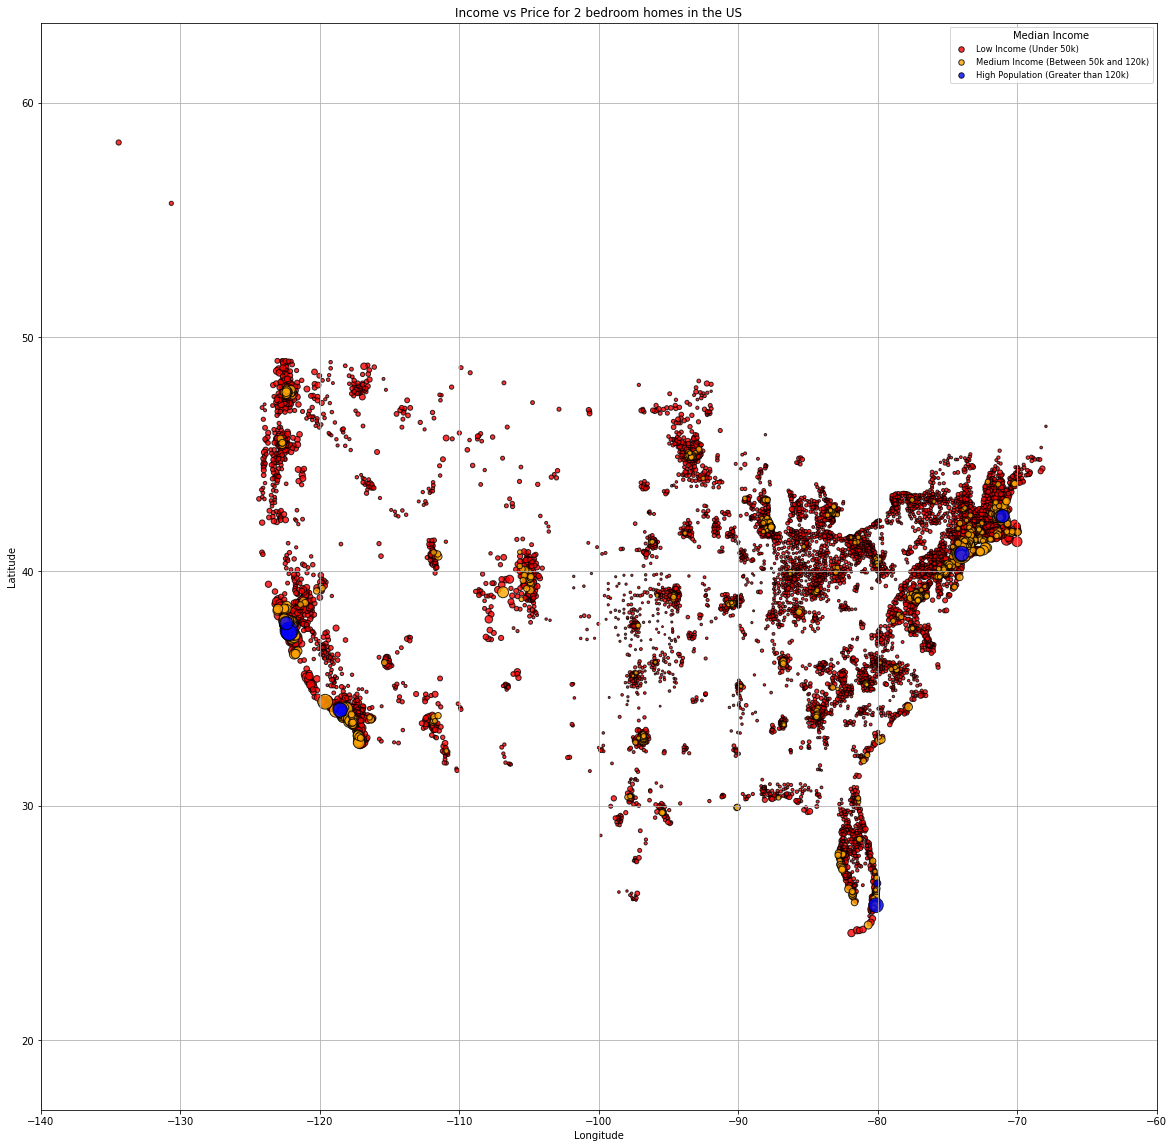

In [80]:
plt.figure(figsize = (20,20))
plt.scatter(lowlngi, 
            lowlati, 
            s=lowpricei / 10000, c="red", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Low Income (Under 50k)")

plt.scatter(Mediumlngi, 
            Mediumlati, 
            s=Mediumpricei / 10000, c="orange", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Medium Income (Between 50k and 120k)")

plt.scatter(Highlngi, 
            Highlati, 
            s=Highpricei / 10000, c="blue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="High Population (Greater than 120k)")

plt.title("Income vs Price for 2 bedroom homes in the US")
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="Median Income", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.xlim((-140,-60))
# Incorporate a text label regarding circle size
# plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")
plt.savefig("output_Income_price_2bedroom.png")
plt.show()

In [47]:
Lowi2 = latlngmerge2[latlngmerge2["Income"] == "Low"]
Mediumi2 = latlngmerge2[latlngmerge2["Income"] == "Middle"]
Highi2 = latlngmerge2[latlngmerge2["Income"] == "High"]

lowlati2 = Lowi2.groupby(["Zipcode"]).max()["Lat"]
lowlngi2 = Lowi2.groupby(["Zipcode"]).max()["Lng"]
lowpricei2 = Lowi2.groupby(["Zipcode"]).mean()["Price"]

Mediumlati2 = Mediumi2.groupby(["Zipcode"]).max()["Lat"]
Mediumlngi2 = Mediumi2.groupby(["Zipcode"]).max()["Lng"]
Mediumpricei2 = Mediumi2.groupby(["Zipcode"]).mean()["Price"]

Highlati2 = Highi2.groupby(["Zipcode"]).max()["Lat"]
Highlngi2 = Highi2.groupby(["Zipcode"]).max()["Lng"]
Highpricei2 = Highi2.groupby(["Zipcode"]).mean()["Price"]

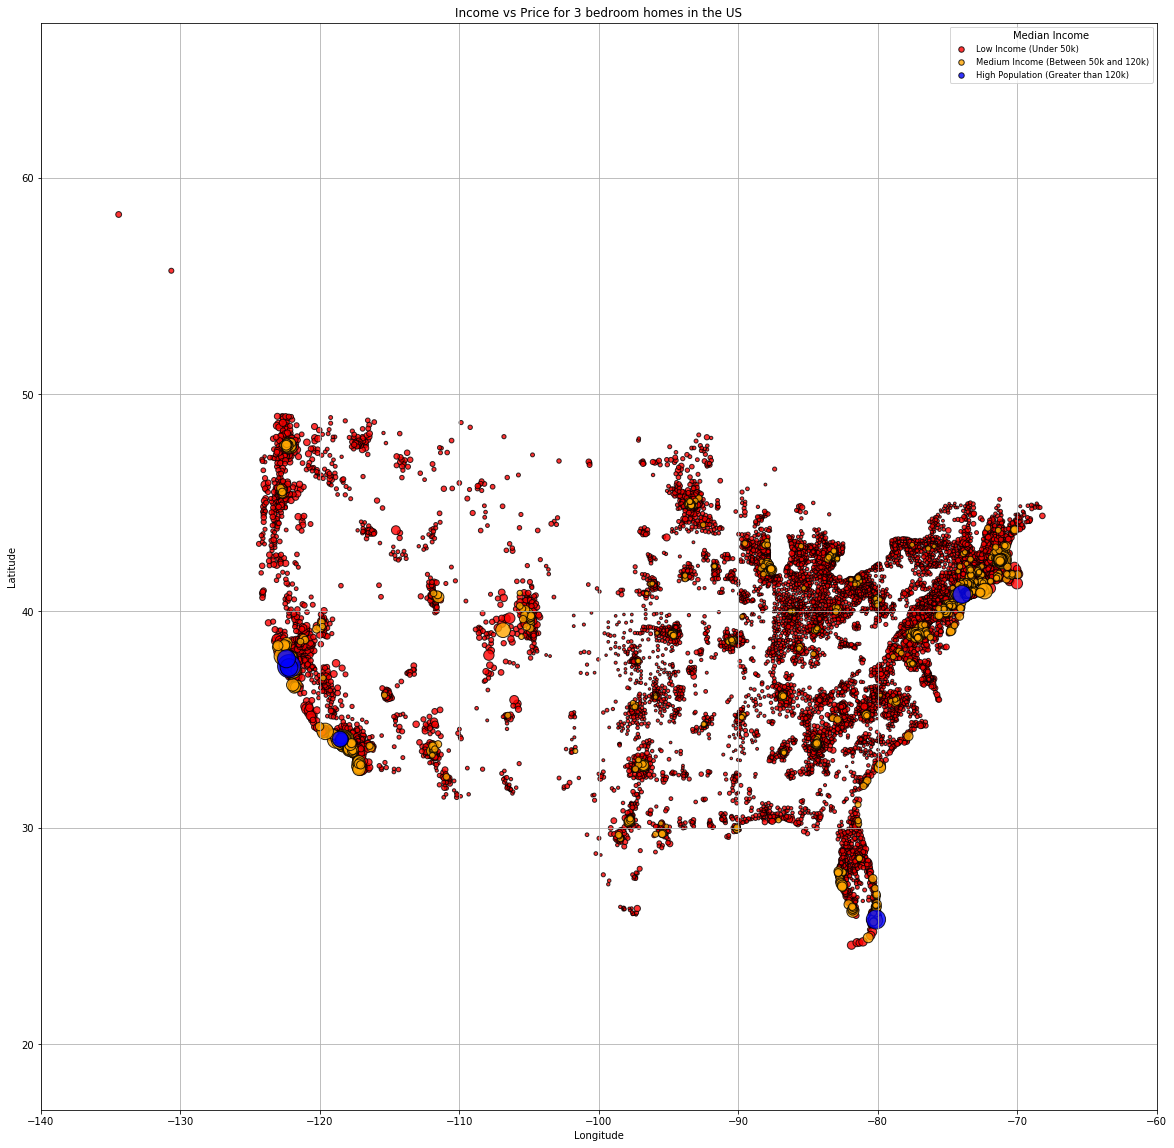

In [48]:
plt.figure(figsize = (20,20))
plt.scatter(lowlngi2, 
            lowlati2, 
            s=lowpricei2 / 10000, c="red", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Low Income (Under 50k)")

plt.scatter(Mediumlngi2, 
            Mediumlati2, 
            s=Mediumpricei2 / 10000, c="orange", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Medium Income (Between 50k and 120k)")

plt.scatter(Highlngi2, 
            Highlati2, 
            s=Highpricei2 / 10000, c="blue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="High Population (Greater than 120k)")

plt.title("Income vs Price for 3 bedroom homes in the US")
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="Median Income", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.xlim((-140,-60))
# Incorporate a text label regarding circle size
# plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")

plt.savefig("output_Income_price_3bedroom.png")
plt.show()

In [51]:
#Income Vs 3 bedroom house in california
ibins = [0, 50000, 120000, 999999]

igroup_names = ['Low', 'Middle', 'High']
pd.cut(california_df["Income"], ibins, labels=igroup_names)
california_df["Income"] = pd.cut(california_df["Income"],ibins, labels=igroup_names)


TypeError: '<' not supported between instances of 'int' and 'str'

In [52]:
Lowpop = california_df[california_df["Income"] == "Low"]
Mediumpop = california_df[california_df["Income"] == "Middle"]
Highpop = california_df[california_df["Income"] == "High"]

lowlat = Lowpop["Lat"]
lowlng = Lowpop["Lng"]
lowprice = Lowpop["Price"]

Mediumlat = Mediumpop["Lat"]
Mediumlng = Mediumpop["Lng"]
Mediumprice = Mediumpop["Price"]

Highlat = Highpop["Lat"]
Highlng = Highpop["Lng"]
Highprice = Highpop["Price"]

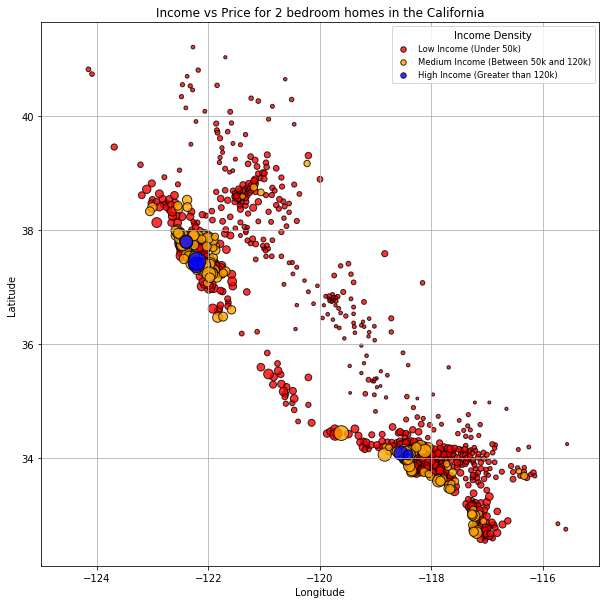

In [53]:
plt.figure(figsize = (10,10))
plt.scatter(lowlng, 
            lowlat, 
            s=lowprice / 10000, c="red", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Low Income (Under 50k)")

plt.scatter(Mediumlng, 
            Mediumlat, 
            s=Mediumprice / 10000, c="orange", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Medium Income (Between 50k and 120k)")

plt.scatter(Highlng, 
            Highlat, 
            s=Highprice / 10000, c="blue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="High Income (Greater than 120k)")

plt.title("Income vs Price for 2 bedroom homes in the California")
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="Income Density", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.xlim((-125,-115))
# Incorporate a text label regarding circle size
# plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")
plt.savefig("output_Income_price_CA.png")
plt.show()